In [41]:
import cx_Oracle as orcl
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from flask import Flask # 플라스크 클래스 임포트
from flask import request, redirect
import pickle # 데이터 저장/로딩을 위한 모듈



### 1. 문제정의
- 사전 문진으로 학생들의 중도퇴원 확률을 구해보자

### 2. 데이터 수집
- 등원하고 있는 학생 110명을 대상으로 중도퇴원하지 않은 컬럼으로 삽입
- 중도 퇴원한 학생들의 데이터를 담임선생님께 받음

In [42]:
data = pd.read_excel('data.xlsx')


,CLASS,AGE,SEX,MAJOR,DISTANCE,INTELLIGIBILITY,PURPOSE,ROOT,APPLY,RESULT
0,인공지능,28,여,문과,중간,1,취업,지인 추천,미지원,0
1,인공지능,27,남,문과,중간,1,취업,지인 추천,미지원,0
2,인공지능,28,남,이과,멀다,3,취업,온라인 검색,미지원,0
3,인공지능,27,남,이과,가깝다,4,취업,오프라인 광고(전단지),지원,0
4,인공지능,27,여,이과,중간,1,취업,지인 추천,미지원,0
...,...,...,...,...,...,...,...,...,...,...
115,인공지능,30,남,이과,중간,1,취업,온라인 검색,미지원,1
116,인공지능,26,남,고졸,가깝다,1,취업,온라인 검색,지원,1
117,IoT,30,남,문과,가깝다,1,취업,오프라인 광고(전단지),지원,1
118,IoT,29,남,고졸,멀다,1,취업,온라인 검색,미지원,1


#### 데이터 전처리


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            120 non-null    object
 1   AGE              120 non-null    int64 
 2   SEX              120 non-null    object
 3   MAJOR            120 non-null    object
 4   DISTANCE         120 non-null    object
 5   INTELLIGIBILITY  120 non-null    int64 
 6   PURPOSE          120 non-null    object
 7   ROOT             120 non-null    object
 8   APPLY            120 non-null    object
 9   RESULT           120 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 9.5+ KB


In [44]:
X = data.loc[:,:"APPLY"] # 문제
y = data.loc[:,"RESULT"] #정답

In [45]:
X_train,X_test,y_train,y_test = train_test_split(
X,y, random_state = 3, test_size = 0.3)

In [46]:
X_train['CLASS'] =X_train['CLASS'].replace('빅데이터','BDT')
X_test['CLASS'] =X_test['CLASS'].replace('빅데이터','BDT')
X_train['CLASS'] =X_train['CLASS'].replace('인공지능','AI')
X_test['CLASS'] =X_test['CLASS'].replace('인공지능','AI')


<ipython-input-46-434489a22e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['CLASS'] =X_train['CLASS'].replace('빅데이터','BDT')
<ipython-input-46-434489a22e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['CLASS'] =X_test['CLASS'].replace('빅데이터','BDT')
<ipython-input-46-434489a22e88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [47]:
X_train['APPLY'] =X_train['APPLY'].replace('지원',1)
X_test['APPLY'] =X_test['APPLY'].replace('지원',1)
X_train['APPLY'] =X_train['APPLY'].replace('미지원',0)
X_test['APPLY'] =X_test['APPLY'].replace('미지원',0)


<ipython-input-47-09ce47b96715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['APPLY'] =X_train['APPLY'].replace('지원',1)
<ipython-input-47-09ce47b96715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['APPLY'] =X_test['APPLY'].replace('지원',1)
<ipython-input-47-09ce47b96715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [48]:
X_train['ROOT'] =X_train['ROOT'].replace('지인 추천','지인추천')
X_test['ROOT'] =X_test['ROOT'].replace('지인 추천','지인추천')
X_train['ROOT'] =X_train['ROOT'].replace('온라인 검색','온라인검색')
X_test['ROOT'] =X_test['ROOT'].replace('온라인 검색','온라인검색')
X_train['ROOT'] =X_train['ROOT'].replace('오프라인 광고(전단지)','오프라인광고')
X_test['ROOT'] =X_test['ROOT'].replace('오프라인 광고(전단지)','오프라인광고')


<ipython-input-48-ef7416bacbd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ROOT'] =X_train['ROOT'].replace('지인 추천','지인추천')
<ipython-input-48-ef7416bacbd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ROOT'] =X_test['ROOT'].replace('지인 추천','지인추천')
<ipython-input-48-ef7416bacbd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [49]:
onehot_column = ['CLASS','SEX','MAJOR','DISTANCE','PURPOSE','ROOT']

In [50]:
for col in onehot_column:
    #원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(X_train[col],prefix = col)
    
    #원핫 인코딩된 결과물을 기존의 자료와 합치기 
    X_train = pd.concat([X_train,dummy], axis=1)
    
    #글자형컬럼(원핫인코딩 진행한)삭제
    X_train.drop(col,axis=1, inplace = True)

In [51]:
for col in onehot_column:
    #원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(X_test[col],prefix = col)
    
    #원핫 인코딩된 결과물을 기존의 자료와 합치기 
    X_test = pd.concat([X_test,dummy], axis=1)
    
    #글자형컬럼(원핫인코딩 진행한)삭제
    X_test.drop(col,axis=1, inplace = True)

In [52]:
print(X_train.shape)
print(X_test.shape)
set(X_train)-set(X_test)




(84, 20)
(36, 19)


{'MAJOR_예체능'}

In [53]:
set(X_test)-set(X_train)

set()

In [54]:
X_test['MAJOR_예체능']=np.NaN
X_test['MAJOR_예체능'] = X_test['MAJOR_예체능'].fillna(0)
#난수 컬럼생성

- 이 난수생성 부분은 데이터가 너무 없어서 임의의 0값으로 채워준것 발표때 굳이 얘기하지않아도 될듯함

### 데이터 스케일링

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[['AGE']])          
X_train['AGE'] = scaler.transform(X_train[['AGE']])


- 데이터가 가장 집중되어있는 AGE를 데이터 스케일링을 통해 데이터셋을 -1~ 1으로 변경함

### 탐색적 데이터 분석

<AxesSubplot:xlabel='ROOT', ylabel='count'>

C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2120\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing 

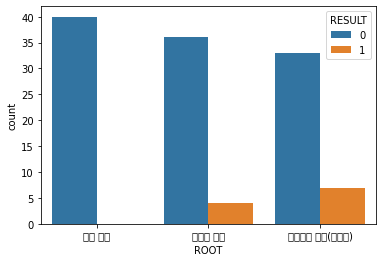

In [72]:
import matplotlib.pyplot as plt
import numpy as np


sns.countplot(data = data,    #사용할데이터
             x= 'ROOT',      # X축으로 사용할 컬럼
             hue= 'RESULT')  # count 에 대한 기준 컬럼

- 들어온 루트와 결과값의 상관관계가있다

### 모델 선정

In [94]:
from sklearn.linear_model import LogisticRegression

logreg_m = LogisticRegression()
logreg=logreg_m.fit(X_train,y_train)
logreg.score(X_train,y_train)


0.9523809523809523

In [95]:
from sklearn.linear_model import LinearRegression 

linear_m = LinearRegression()
linear=linear_m.fit(X_train,y_train)
linear.score(X_train,y_train)

0.30318603108362974

In [96]:
from sklearn.ensemble import RandomForestRegressor

forest_m = RandomForestRegressor()
forest=forest_m.fit(X_train,y_train)
forest.score(X_train,y_train)

0.7489314935897435

-  3개의 모델을 비교해서 LogisticRegression이 가장 성능이 좋은 모델인것을 확인

### 평가
- 교차검증


In [106]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_m ,X_test , y_test ,cv=3).mean()


0.9444444444444445

- 이부분을 모델의 정확도로 말해도됨

In [59]:
# pickle 파일에 모델 저장
with open("pro_model.pkl",'wb') as f :
    pickle.dump(logreg,f)

In [60]:
#pickle 파일에 X_train 컬럼 저장
with open('pro_column_name.pkl','wb') as f2 :
    pickle.dump(X_train.columns,f2)